In [1]:
#https://anaconda.org/anaconda/sas7bdat
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
with SAS7BDAT('crime.sas7bdat') as file:
    df_sas=file.to_data_frame()

[crime.sas7bdat] header length 65536 != 8192


In [3]:
#print(df_sas['Location'])
print(df_sas[['Description','IUCR']])
print(df_sas.columns)

                           Description  IUCR
0                    POSS: BARBITUATES  2021
1                               SIMPLE  0460
2       ARMED:KNIFE/CUTTING INSTRUMENT  0312
3                        HOME INVASION  0650
4                           AUTOMOBILE  0910
...                                ...   ...
105946       AGG CRIMINAL SEXUAL ABUSE  1562
105947       AGG CRIMINAL SEXUAL ABUSE  1562
105948                      TO VEHICLE  1320
105949        FRAUD OR CONFIDENCE GAME  1130
105950                  $500 AND UNDER  0820

[105951 rows x 2 columns]
Index(['date', 'fbi_code', 'arrest_code', 'Arrest', 'Case_Number', 'Block',
       'IUCR', 'Primary_Type', 'Description', 'Location_Description',
       'Domestic', 'Location', 'ID', 'timestamp', 'Beat', 'District', 'Ward',
       'Community_Area', 'X_Coordinate', 'Y_Coordinate', 'Year', 'Updated_On',
       'Latitude', 'Longitude'],
      dtype='object')


In [9]:
filter=df_sas['IUCR'].isin(['0820','0640','0890'])
print(df_sas[filter]['Primary_Type'].unique())

['THEFT']


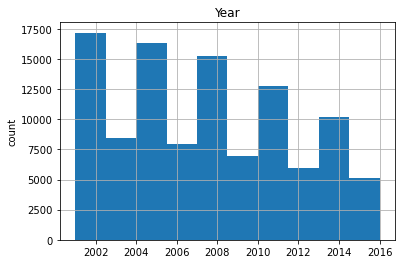

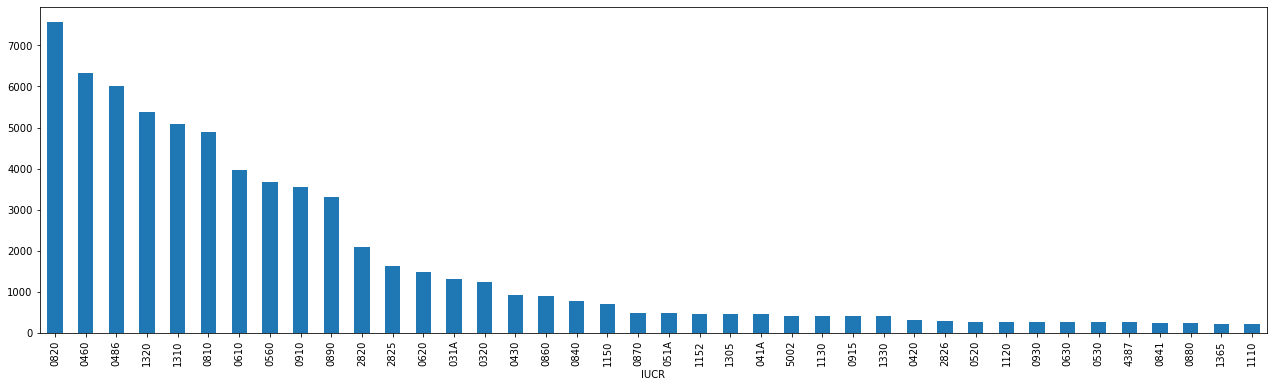

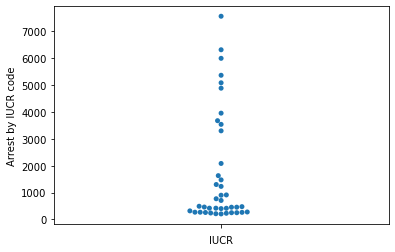

In [13]:
pd.DataFrame.hist(df_sas[['Year']])
plt.ylabel('count')
plt.show()

df_sas['ArrestInt']=df_sas['Arrest'].apply(lambda x: 0 if x=='true' else 1)

#print(df_sas['ArrestInt'])
plt.figure(figsize=(22,6))
iucr=df_sas.groupby(['IUCR'])['ArrestInt'].sum().nlargest(40).sort_values(ascending=False)
iucr.plot.bar()
plt.show()

#print(iucr.index)

_ = sns.swarmplot(y=iucr.values)
_ = plt.xlabel('IUCR')
_ = plt.ylabel('Arrest by IUCR code')

# Show the plot
plt.show()

#print(df_sas.groupby(['District'])['Arrest'].count())

In [16]:
#sns.heatmap(data=df_sas,x='ArrestInt',y='IUCR')

In [289]:
arrest_descriptions=df_sas[df_sas['IUCR'].isin(iucr.index)]['Description'].unique()

arrest_descriptions=np.sort(arrest_descriptions)

result= df_sas[df_sas['Description'].isin(arrest_descriptions)]

#result=result[result['Year']==2016].groupby('Description')['ArrestInt'].apply(lambda x: x.sum()).reset_index()
result=result.groupby('Description')['ArrestInt'].apply(lambda x: x.sum()).reset_index()

#print(result.head())

print (df_sas['Year'].unique())

for key,item in result.iterrows():
    print(item['Description']," [Occurrences: "+ str(item['ArrestInt'])+']')
    #print(item.Description,item.ArrestInt)

[2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005.
 2004. 2003. 2002. 2001.]
$500 AND UNDER  [Occurrences: 7567]
AGGRAVATED: HANDGUN  [Occurrences: 943]
AGGRAVATED: OTHER DANG WEAPON  [Occurrences: 1166]
AGGRAVATED:KNIFE/CUTTING INSTR  [Occurrences: 589]
ARMED: HANDGUN  [Occurrences: 1301]
ATTEMPT FORCIBLE ENTRY  [Occurrences: 259]
AUTOMOBILE  [Occurrences: 3541]
BOGUS CHECK  [Occurrences: 206]
CREDIT CARD FRAUD  [Occurrences: 707]
CRIMINAL DEFACEMENT  [Occurrences: 457]
DOMESTIC BATTERY SIMPLE  [Occurrences: 6000]
FINANCIAL ID THEFT: OVER $300  [Occurrences: 771]
FINANCIAL ID THEFT:$300 &UNDER  [Occurrences: 240]
FORCIBLE ENTRY  [Occurrences: 3958]
FORGERY  [Occurrences: 269]
FRAUD OR CONFIDENCE GAME  [Occurrences: 420]
FROM BUILDING  [Occurrences: 3300]
HARASSMENT BY ELECTRONIC MEANS  [Occurrences: 278]
HARASSMENT BY TELEPHONE  [Occurrences: 1631]
ILLEGAL USE CASH CARD  [Occurrences: 462]
OTHER VEHICLE OFFENSE  [Occurrences: 421]
OVER $500  [Occurrences: 4888]
P

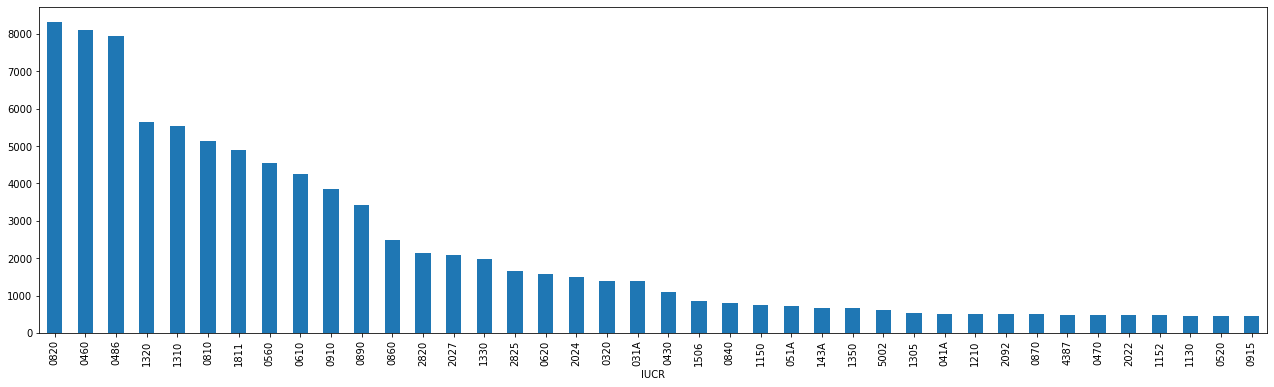

In [290]:
#print(df_sas['Domestic'])

df_sas['DomesticInt']=df_sas['Domestic'].astype(bool).astype(int)
#result=result.groupby('Description')['Domestic'].apply(lambda x: x.sum()).reset_index()

plt.figure(figsize=(22,6))
iucr=df_sas.groupby(['IUCR'])['DomesticInt'].sum().nlargest(40).sort_values(ascending=False)
iucr.plot.bar()
plt.show()


Domestic:


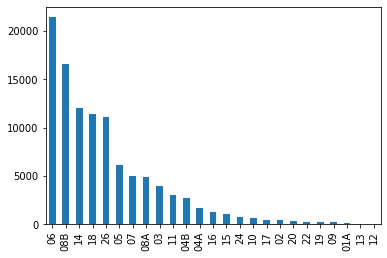

no Non-Domestic:
IUCR


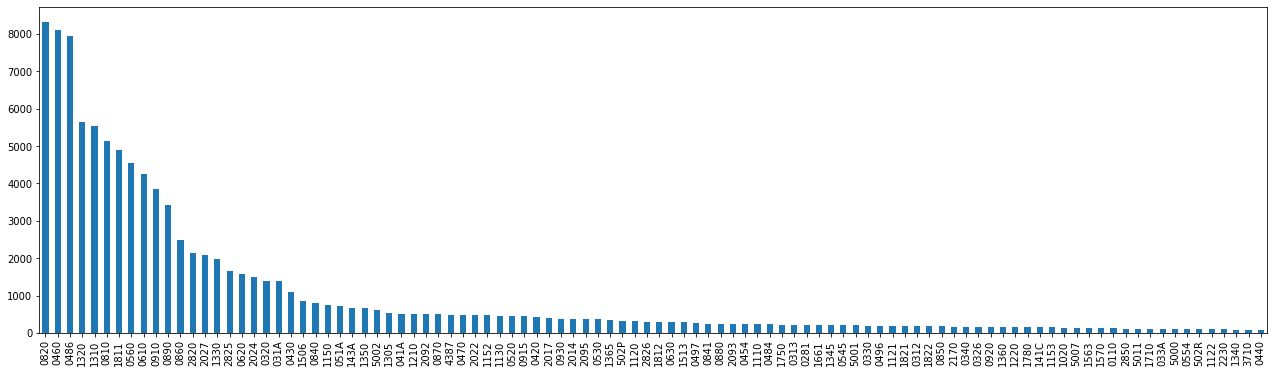

In [291]:
#features = ['IUCR','fbi_code','arrest_code','primary_type']

#sns.pairplot(
#    data=df_sas,
#    vars=features,
#    size=1,
#    plot_kws={'s': 5}
#)
#plt.show()
#print("arrest_code")
#print(df_sas['arrest_code'].value_counts())
#print("fbi_code")

df_sas['Domestic']=df_sas['Domestic'].astype(bool)

filter=df_sas['Domestic']==True
print("Domestic:")
#print(df_sas[filter]['fbi_code'].value_counts())
df_sas[filter]['fbi_code'].value_counts().plot.bar()
plt.show()

filter=df_sas['Domestic'].isnull()==True

print("no Non-Domestic:")
#print(df_sas[filter]['fbi_code'].value_counts())
#result=df_sas[filter]['fbi_code'].value_counts()
#print(len(result))
#plt.show()

plt.figure(figsize=(22,6))
print("IUCR")
#print(df_sas['IUCR'].value_counts())
df_sas['IUCR'].value_counts().nlargest(100).plot.bar()
plt.show()

In [292]:
districts=df_sas['District'].unique()
print(districts)

print(df_sas[df_sas['District'].isin(districts)]['ArrestInt'].mean())

print(df_sas.groupby('District')['ArrestInt'].mean())

print(df_sas.groupby(['District','Ward'])['ArrestInt'].mean())

[25. 18. 11. 10. 12.  7.  6.  3.  5.  1.  4. 19. 16. 20.  9. 14. 24. 15.
  8.  2. 22. 17. 31.]
0.7011071155534162
District
1.0     0.683430
2.0     0.687097
3.0     0.706526
4.0     0.750902
5.0     0.714162
6.0     0.709704
7.0     0.692112
8.0     0.739233
9.0     0.679830
10.0    0.650738
11.0    0.541198
12.0    0.730495
14.0    0.766406
15.0    0.551181
16.0    0.789549
17.0    0.756931
18.0    0.724438
19.0    0.745222
20.0    0.739223
22.0    0.761891
24.0    0.734991
25.0    0.697589
31.0    0.000000
Name: ArrestInt, dtype: float64
District  Ward
1.0       2.0     0.709677
          3.0     0.480556
          4.0     0.739130
          27.0    1.000000
          42.0    0.703054
                    ...   
25.0      35.0    0.813830
          36.0    0.770979
          37.0    0.641064
31.0      6.0     0.000000
          27.0    0.000000
Name: ArrestInt, Length: 134, dtype: float64


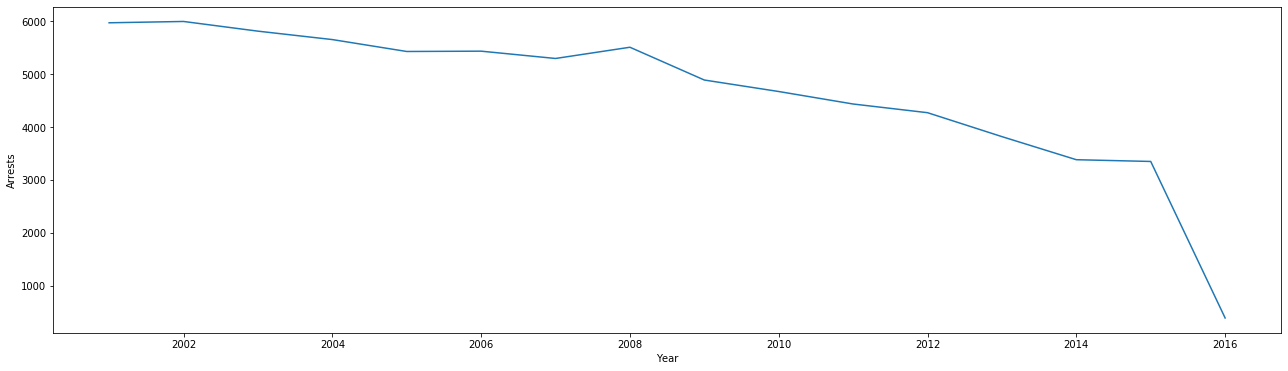

In [293]:
def left(s, amount):
    return s[:amount]

def right(s, amount):
    return s[-amount:]

def mid(s, offset, amount):
    return s[offset:offset+amount]

df_sas['Year']=pd.DatetimeIndex(df_sas['date']).year
df_sas['Hour']=pd.DatetimeIndex(df_sas['date']).hour
df_sas['Month']=pd.DatetimeIndex(df_sas['date']).month

arrest_year=df_sas.groupby(['Year'])['ArrestInt'].sum()

plt.figure(figsize=(22,6))
arrest_year.plot()
plt.xlabel('Year')
plt.ylabel('Arrests')
plt.show()

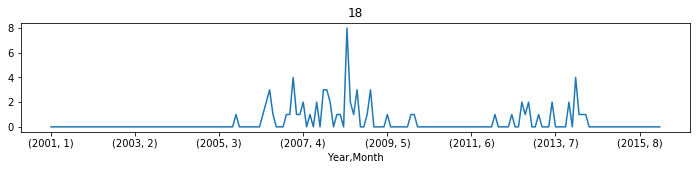

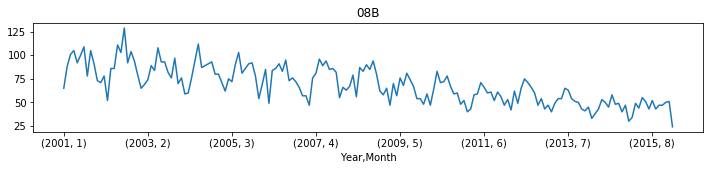

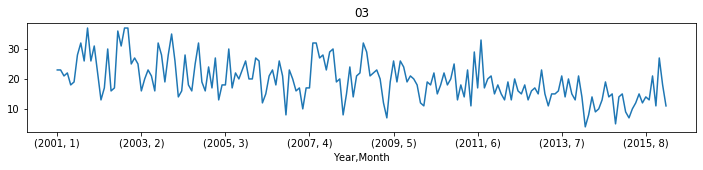

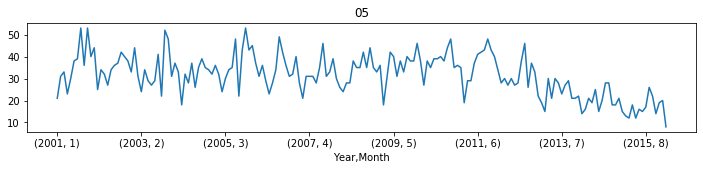

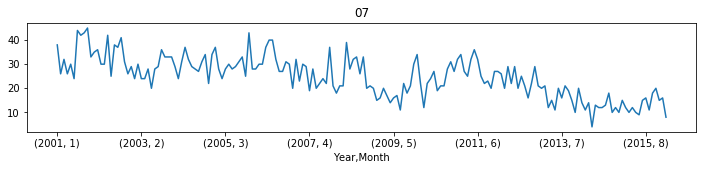

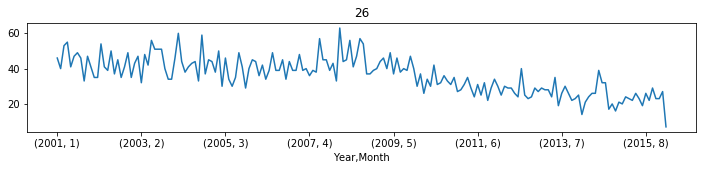

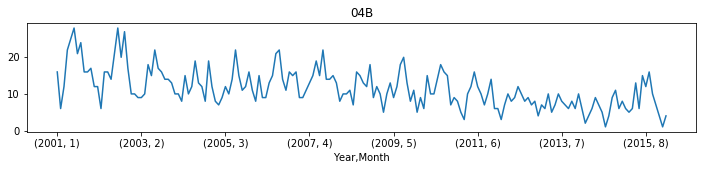

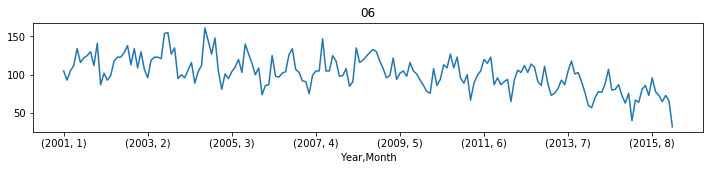

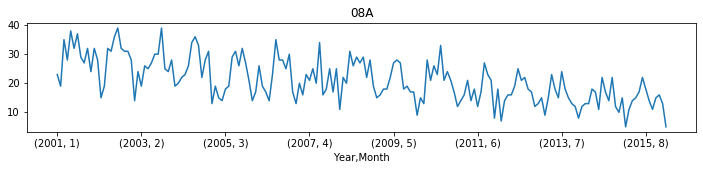

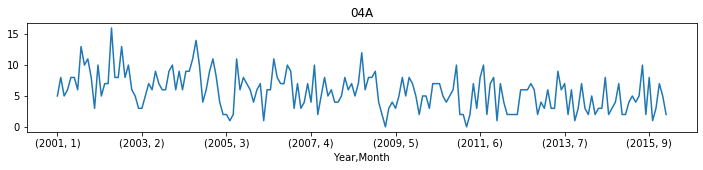

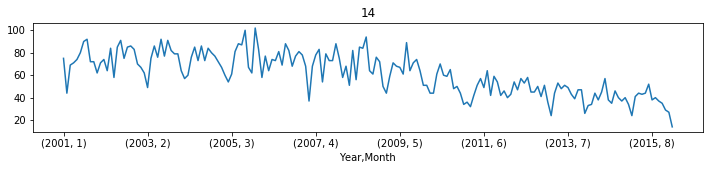

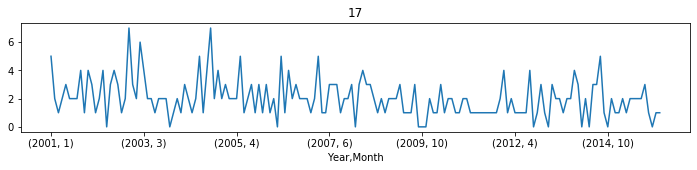

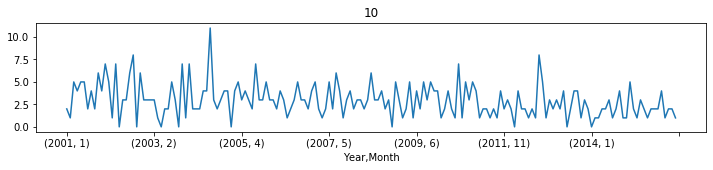

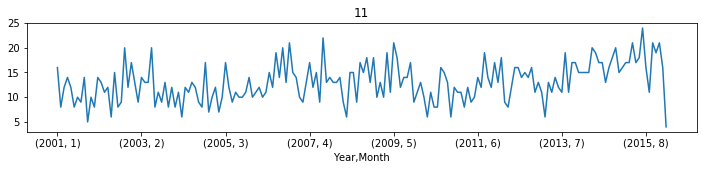

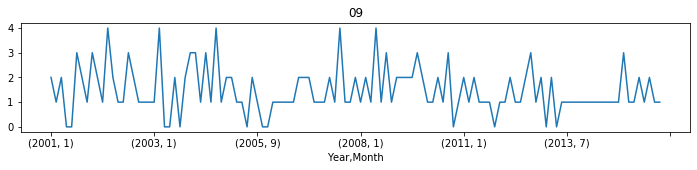

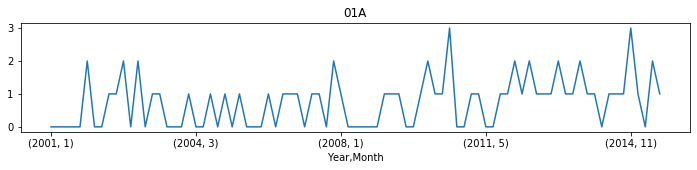

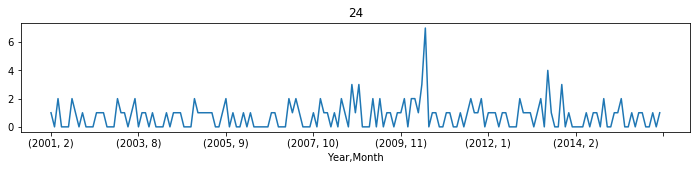

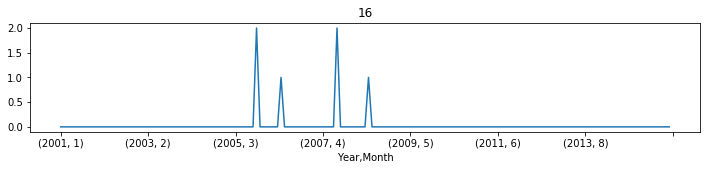

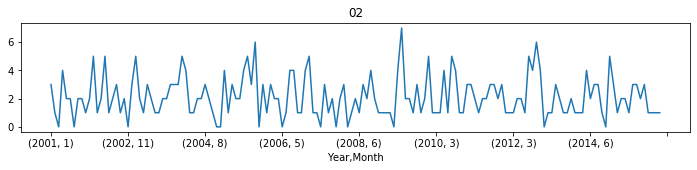

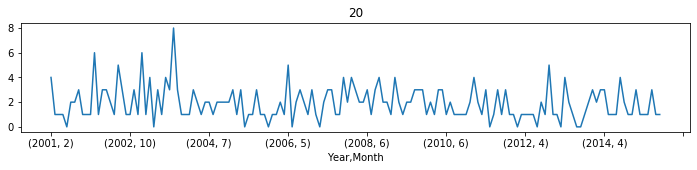

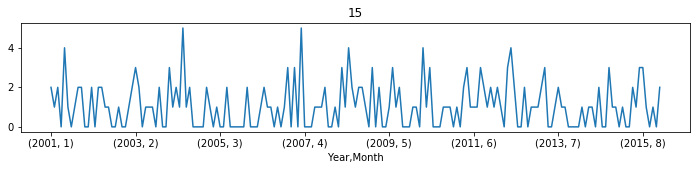

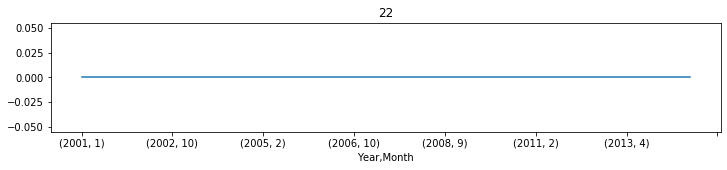

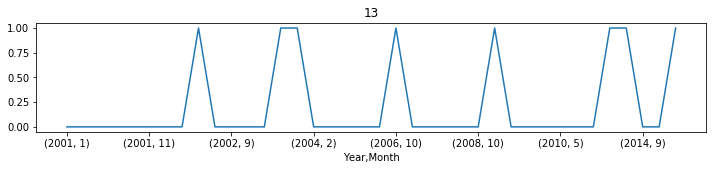

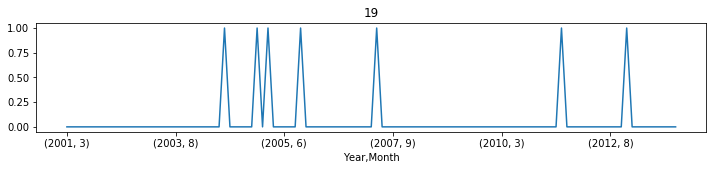

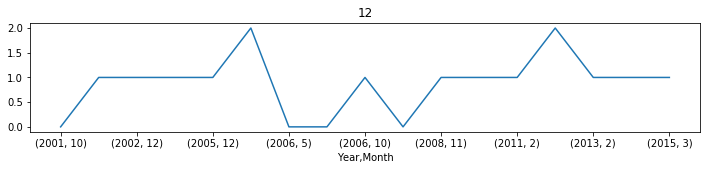

In [294]:
fbi_codes=df_sas['fbi_code'].unique()

for code in fbi_codes:
    #print(code)
    filter=df_sas['fbi_code']==code
    data=df_sas[filter].groupby(['Year','Month'])['ArrestInt'].sum()
    plt.figure(figsize=(12,2))             
    plt.title(code)
    data.plot()
    plt.show()




C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


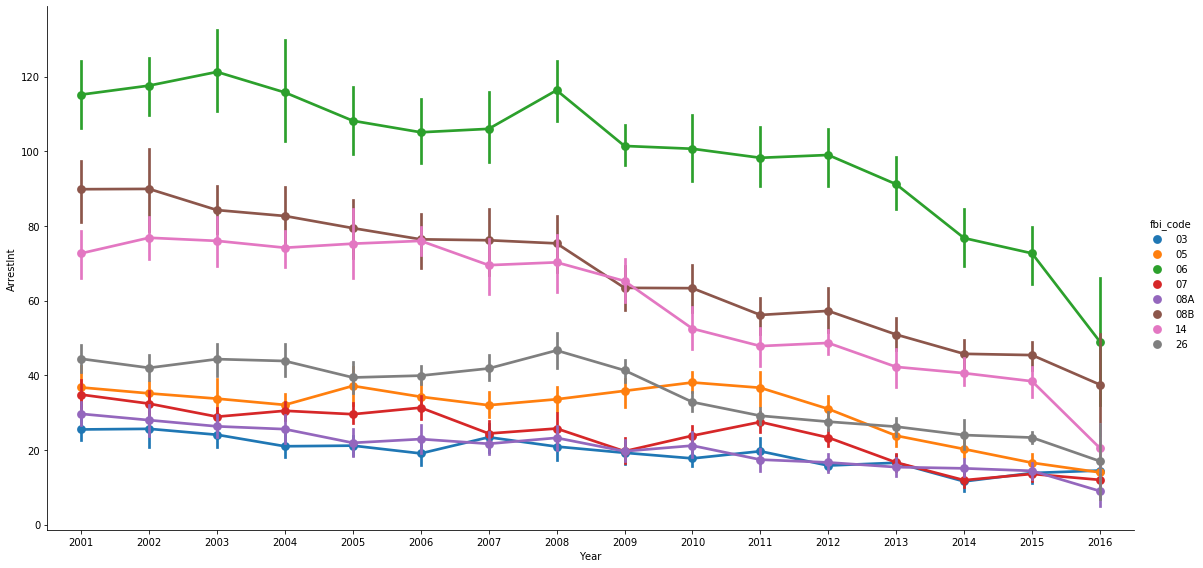

In [295]:
result=df_sas.groupby(['Year','Month','fbi_code'])['ArrestInt'].sum().reset_index()
#print(top20.columns)
mask=result['ArrestInt']>30
fbi_codes=result[mask]['fbi_code'].unique()

filter=df_sas['fbi_code'].isin(fbi_codes) 
fbi_codes=df_sas['fbi_code'].unique()

arrest_breakdown=df_sas[filter].groupby(['Year','Month','fbi_code'])['ArrestInt'].sum().reset_index()
keys=arrest_breakdown.keys()
#print(arrest_breakdown)

g = sns.factorplot(data=arrest_breakdown, x='Year', y='ArrestInt', 
                  hue='fbi_code',  kind='point',size=8,aspect=2)

plt.show()



In [296]:
def check(polygon, lon, lat):
    # build a shapely point from your geopoint
    point = Point(lon, lat)

    # the contains function does exactly what you want
    return polygon.contains(point)

import shapefile
from shapely.geometry import shape, Point,Polygon

myshp = open('idaho_shapely.shp', 'rb')
mydbf = open('idaho_shapely.dbf', 'rb')

reader = shapefile.Reader(shp=myshp, dbf=mydbf)

print(reader.bbox)
print(reader.numRecords)
#print(type(shape))

#shapes = reader.shapes()
#polygon = shape(shapes[0])  

#print(polygon)

#df_idaho=df_sas.copy(deep=False)
#for index,item in df_sas.iterrows():
#    latitude=item['Latitude']
#    longitude=item['Longitude']
#    for i in np.arange(len(shapes)):
#        polygon=shape(shapes[i])
 #       if check(polygon, latitude,longitude)==True:
#            df_idaho.append(item)
#            print(item)
    

[-117.046587, 41.998903, -111.080857, 48.735223999999995]
227


In [297]:
#2print(df_idaho.head())

         date fbi_code  arrest_code Arrest Case_Number                 Block  \
0  2016-02-15       18          1.0   true    HZ152887   022XX N KOSTNER AVE   
1  2016-02-15      08B          1.0   true    HZ152697  007XX N MICHIGAN AVE   
2  2016-02-15       03          0.0  false    HZ153736     040XX W WILCOX ST   
3  2016-02-15       05          0.0  false    HZ152307    023XX S LEAVITT ST   
4  2016-02-15       07          0.0  false    HZ152103   053XX W LE MOYNE ST   

   IUCR         Primary_Type                     Description  \
0  2021            NARCOTICS               POSS: BARBITUATES   
1  0460              BATTERY                          SIMPLE   
2  0312              ROBBERY  ARMED:KNIFE/CUTTING INSTRUMENT   
3  0650             BURGLARY                   HOME INVASION   
4  0910  MOTOR VEHICLE THEFT                      AUTOMOBILE   

  Location_Description  ...  X_Coordinate Y_Coordinate  Year  \
0               STREET  ...     1146691.0    1914427.0  2016   
1   SM